# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_city = []
city_lat = []
city_lng = []
city_max = []
city_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
city_date = []
units = "imperial"

count = 0
set = 1
print("Beginning Data Retrieval")

#Make a request for each of the cities
#for x in range(10):
for x in range(len(cities)):
        count = count + 1
   
        if count <= 50:
            print(f"Processing Weather Record: {x} of Set {set} | {cities[x]}")
            query_url = f"{url}appid={weather_api_key}&q={cities[x]}&units={units}"
            response = requests.get(query_url).json()
                
            try:     
                #lat = weather_json["coord"]["lat"]
                city_city.append(response["name"])
                city_lat.append(response["coord"]["lat"])
                city_lng.append(response["coord"]["lon"])
                city_max.append(response["main"]["temp_max"])
                city_temp.append(response["main"]["temp"])
                city_humidity.append(response["main"]["humidity"])
                city_cloudiness.append(response["clouds"]["all"])
                city_windspeed.append(response["wind"]["speed"])
                city_country.append(response["sys"]["country"])
                city_date.append(response["dt"])     
                print(f"{cities[x]} City found! Appending response")
            except:
                print(f"{cities[x]} City was not found! Skipping...")
                pass
        
        else:
            count = 0
            set = set + 1
            time.sleep(50)

Beginning Data Retrieval
Processing Weather Record: 0 of Set 1 | kavieng
kavieng City found! Appending response
Processing Weather Record: 1 of Set 1 | saint-philippe
saint-philippe City found! Appending response
Processing Weather Record: 2 of Set 1 | yulara
yulara City found! Appending response
Processing Weather Record: 3 of Set 1 | hermanus
hermanus City found! Appending response
Processing Weather Record: 4 of Set 1 | khatanga
khatanga City found! Appending response
Processing Weather Record: 5 of Set 1 | trstena
trstena City found! Appending response
Processing Weather Record: 6 of Set 1 | takaungu
takaungu City found! Appending response
Processing Weather Record: 7 of Set 1 | mataura
mataura City found! Appending response
Processing Weather Record: 8 of Set 1 | kodiak
kodiak City found! Appending response
Processing Weather Record: 9 of Set 1 | newport
newport City found! Appending response
Processing Weather Record: 10 of Set 1 | melilla
melilla City found! Appending response
P

moron City found! Appending response
Processing Weather Record: 92 of Set 2 | krasnoselkup
krasnoselkup City found! Appending response
Processing Weather Record: 93 of Set 2 | inhambane
inhambane City found! Appending response
Processing Weather Record: 94 of Set 2 | longonjo
longonjo City found! Appending response
Processing Weather Record: 95 of Set 2 | nguiu
nguiu City was not found! Skipping...
Processing Weather Record: 96 of Set 2 | ribeira grande
ribeira grande City found! Appending response
Processing Weather Record: 97 of Set 2 | clyde river
clyde river City found! Appending response
Processing Weather Record: 98 of Set 2 | nikolskoye
nikolskoye City found! Appending response
Processing Weather Record: 99 of Set 2 | liberty
liberty City found! Appending response
Processing Weather Record: 100 of Set 2 | taolanaro
taolanaro City was not found! Skipping...
Processing Weather Record: 102 of Set 3 | hamilton
hamilton City found! Appending response
Processing Weather Record: 103 of

carutapera City found! Appending response
Processing Weather Record: 182 of Set 4 | zhigansk
zhigansk City found! Appending response
Processing Weather Record: 183 of Set 4 | vatava
vatava City found! Appending response
Processing Weather Record: 184 of Set 4 | mackay
mackay City found! Appending response
Processing Weather Record: 185 of Set 4 | hilo
hilo City found! Appending response
Processing Weather Record: 186 of Set 4 | ban nahin
ban nahin City found! Appending response
Processing Weather Record: 187 of Set 4 | hofn
hofn City found! Appending response
Processing Weather Record: 188 of Set 4 | sao jose da coroa grande
sao jose da coroa grande City found! Appending response
Processing Weather Record: 189 of Set 4 | tasiilaq
tasiilaq City found! Appending response
Processing Weather Record: 190 of Set 4 | boysun
boysun City found! Appending response
Processing Weather Record: 191 of Set 4 | coihaique
coihaique City found! Appending response
Processing Weather Record: 192 of Set 4 

belmonte City found! Appending response
Processing Weather Record: 274 of Set 6 | hede
hede City found! Appending response
Processing Weather Record: 275 of Set 6 | tacuarembo
tacuarembo City found! Appending response
Processing Weather Record: 276 of Set 6 | marrakesh
marrakesh City found! Appending response
Processing Weather Record: 277 of Set 6 | laiyang
laiyang City found! Appending response
Processing Weather Record: 278 of Set 6 | jacareacanga
jacareacanga City found! Appending response
Processing Weather Record: 279 of Set 6 | macae
macae City found! Appending response
Processing Weather Record: 280 of Set 6 | cockburn town
cockburn town City found! Appending response
Processing Weather Record: 281 of Set 6 | bolungarvik
bolungarvik City was not found! Skipping...
Processing Weather Record: 282 of Set 6 | isa khel
isa khel City found! Appending response
Processing Weather Record: 283 of Set 6 | pinsk
pinsk City found! Appending response
Processing Weather Record: 284 of Set 6 |

afikpo City found! Appending response
Processing Weather Record: 366 of Set 8 | saint-pierre
saint-pierre City found! Appending response
Processing Weather Record: 367 of Set 8 | monywa
monywa City found! Appending response
Processing Weather Record: 368 of Set 8 | kosino
kosino City found! Appending response
Processing Weather Record: 369 of Set 8 | brae
brae City found! Appending response
Processing Weather Record: 370 of Set 8 | sioux lookout
sioux lookout City found! Appending response
Processing Weather Record: 371 of Set 8 | maloshuyka
maloshuyka City was not found! Skipping...
Processing Weather Record: 372 of Set 8 | nova odesa
nova odesa City found! Appending response
Processing Weather Record: 373 of Set 8 | tecoanapa
tecoanapa City found! Appending response
Processing Weather Record: 374 of Set 8 | kamenka
kamenka City found! Appending response
Processing Weather Record: 375 of Set 8 | venado tuerto
venado tuerto City found! Appending response
Processing Weather Record: 376 

alexandria City found! Appending response
Processing Weather Record: 457 of Set 9 | novodugino
novodugino City found! Appending response
Processing Weather Record: 459 of Set 10 | at-bashi
at-bashi City found! Appending response
Processing Weather Record: 460 of Set 10 | danjiangkou
danjiangkou City found! Appending response
Processing Weather Record: 461 of Set 10 | santiago del estero
santiago del estero City found! Appending response
Processing Weather Record: 462 of Set 10 | safwah
safwah City was not found! Skipping...
Processing Weather Record: 463 of Set 10 | akdagmadeni
akdagmadeni City found! Appending response
Processing Weather Record: 464 of Set 10 | kota bahru
kota bahru City found! Appending response
Processing Weather Record: 465 of Set 10 | karaul
karaul City was not found! Skipping...
Processing Weather Record: 466 of Set 10 | eston
eston City found! Appending response
Processing Weather Record: 467 of Set 10 | jalu
jalu City found! Appending response
Processing Weathe

laguna City found! Appending response
Processing Weather Record: 548 of Set 11 | surt
surt City found! Appending response
Processing Weather Record: 549 of Set 11 | nuuk
nuuk City found! Appending response
Processing Weather Record: 550 of Set 11 | ahipara
ahipara City found! Appending response
Processing Weather Record: 551 of Set 11 | powell river
powell river City found! Appending response
Processing Weather Record: 552 of Set 11 | papara
papara City found! Appending response
Processing Weather Record: 553 of Set 11 | anadyr
anadyr City found! Appending response
Processing Weather Record: 554 of Set 11 | ishigaki
ishigaki City found! Appending response
Processing Weather Record: 555 of Set 11 | bubaque
bubaque City found! Appending response
Processing Weather Record: 556 of Set 11 | khanpur
khanpur City found! Appending response
Processing Weather Record: 557 of Set 11 | san policarpo
san policarpo City found! Appending response
Processing Weather Record: 558 of Set 11 | sorland
sor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a data frame from cities
weather_dict = {
   "City": city_city,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max temp": city_max,
    "Temp": city_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_cloudiness,
    "Windspeed": city_windspeed,
    "Country": city_country,
    "Date": city_date    
}
weather_data = pd.DataFrame(weather_dict)

In [5]:
weather_data.to_csv("../../output_data/cityweather_data.csv",
                  encoding="utf-8", index=False, header=True)

In [6]:
weather_data.head()

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Kavieng,-2.5744,150.7967,80.69,80.69,82,100,7.56,PG,1639820794
1,Saint-Philippe,-21.3585,55.7679,86.11,83.97,72,16,2.01,RE,1639821072
2,Yulara,-25.2406,130.9889,109.24,109.24,8,15,10.36,AU,1639820871
3,Hermanus,-34.4187,19.2345,89.91,78.80,42,10,13.42,ZA,1639821073
4,Khatanga,71.9667,102.5000,-39.32,-39.32,100,65,3.13,RU,1639820909


In [7]:
weather_data.describe()

,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,19.955763,20.069400,52.464898,51.778835,70.929760,60.033272,7.698688,1.639821e+09
std,32.901783,91.102498,32.271168,32.358545,23.226794,38.066788,5.740644,2.271913e+02
min,-54.800000,-179.166700,-44.880000,-44.880000,7.000000,0.000000,0.000000,1.639821e+09
25%,-6.121900,-60.633300,35.200000,33.710000,57.000000,20.000000,3.420000,1.639821e+09
50%,22.566700,20.866700,62.460000,61.000000,76.000000,75.000000,6.040000,1.639821e+09
75%,46.616600,102.238600,77.340000,77.110000,90.000000,97.000000,10.870000,1.639822e+09
max,78.218600,179.316700,109.240000,109.240000,100.000000,100.000000,31.320000,1.639822e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index =  weather_data[weather_data['Humidity'] >= 100].index
index

Int64Index([  4,  12,  25,  79, 112, 119, 140, 160, 194, 230, 255, 291, 346,
            401, 426, 471, 485, 531, 538],
           dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index,inplace=False)

In [10]:
clean_city_data.describe()

,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Date
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,18.668352,19.684676,54.473199,53.781494,69.871648,59.676245,7.808621,1.639821e+09
std,32.491287,90.697706,29.979134,30.124982,22.961221,38.365158,5.784740,2.261415e+02
min,-54.800000,-179.166700,-42.390000,-42.390000,7.000000,0.000000,0.000000,1.639821e+09
25%,-7.451800,-60.511425,35.920000,34.822500,56.000000,20.000000,3.440000,1.639821e+09
50%,21.717950,20.513700,63.760000,62.960000,75.000000,75.000000,6.210000,1.639821e+09
75%,45.301525,100.297375,78.060000,77.402500,88.000000,98.000000,11.180000,1.639822e+09
max,78.218600,179.316700,109.240000,109.240000,99.000000,100.000000,31.320000,1.639822e+09


In [11]:
clean_city_data.head(10)

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Kavieng,-2.5744,150.7967,80.69,80.69,82,100,7.56,PG,1639820794
1,Saint-Philippe,-21.3585,55.7679,86.11,83.97,72,16,2.01,RE,1639821072
2,Yulara,-25.2406,130.9889,109.24,109.24,8,15,10.36,AU,1639820871
3,Hermanus,-34.4187,19.2345,89.91,78.80,42,10,13.42,ZA,1639821073
5,Trstená,49.3610,19.6125,35.20,31.98,87,89,7.00,SK,1639821073
6,Takaungu,-3.6837,39.8566,87.89,87.89,65,89,7.07,KE,1639821073
7,Mataura,-46.1927,168.8643,57.47,57.47,67,100,2.21,NZ,1639821074
8,Saint Paul Harbor,57.7900,-152.4072,30.90,30.90,76,100,5.48,US,1639820826
9,Newport,51.5877,-2.9984,47.55,46.36,90,61,11.92,GB,1639821054
10,Melilla,35.2937,-2.9383,59.38,59.38,82,75,11.50,ES,1639821074


In [12]:
clean_city_data.shape

(522, 10)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

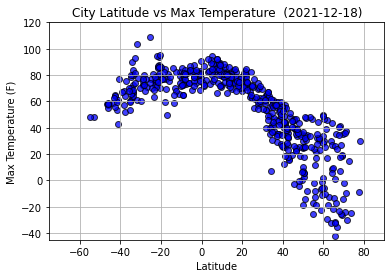

In [14]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature  ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-75,90)
plt.ylim(-45, 120)

# Save the figure
plt.savefig("../../output_data/LatMaxTempInWorldCities.png")

# Show plot
plt.show()

This plot shows that Temperatures cool with increasing Latitude! There is a relationship between Latitude and Temperature around the world, as temperatures are typically warmer approaching the Equator and cooler approaching the Poles.
The Equator has a latitude of 0°, the North Pole has a latitude of 90° North (written 90° N or +90°), and the South Pole has a latitude of 90° South (written 90° S or −90°)
This plot uses the degree Fahrenheit (symbol: °F) as the unit of measure for temperature. On the Fahrenheit scale, the melting point of water is 32°F and the boiling point is 212°F (at standard atmospheric pressure). The world temperatures plotted appear to be mostly within this range.

## Latitude vs. Humidity Plot

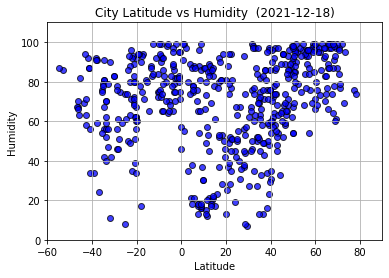

In [15]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity  ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.xlim(-60, 90)
plt.ylim(0, 110)

# Save the figure
plt.savefig("../../output_data/LatHumidityWorldCities.png")

# Show plot
plt.show()

Humidity does not show a strong correlation to latitude. The visualization shows a variety of humidity percentages at different latitudes.Humidity is the concentration of water vapour present in the air and indicates the likelihood for precipitation, dew, or fog to be present.
The humidity is affected by winds and by rainfall. The most humid cities on earth are generally located closer to the equator, near coastal regions. The visualisation shows higher humidity near the tropical equator.
Humidity depends on the temperature and pressure of the system of interest. When the temperature rises, humidity decreases and when temperature decreases, humidity increases. The same amount of water vapor results in higher humidity in cool air than warm air. The plot shows a relative humidity higher closer to polar regions.

## Latitude vs. Cloudiness Plot

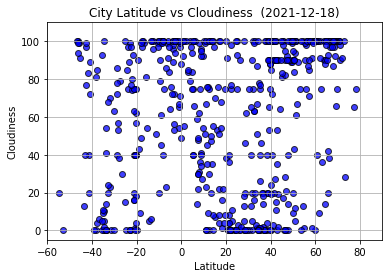

In [16]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness  ({date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
plt.ylim(-5, 110)

# Save the figure
plt.savefig("../../output_data/LatCloudinessInWorldCities.png")

# Show plot
plt.show()

We cannot see a distictive pattern between Cloudiness and Latitude. Continents tend to be less cloudy than adjacent oceans (at the same latitude), except in the equatorial belt. Cloudiness is highest around 60° S but there is less cloud cover at the South Pole. This figure reflects the ascent and subsidence occurring at these respective latitudes, and the large amount of ocean at around 60° S.

## Latitude vs. Wind Speed Plot

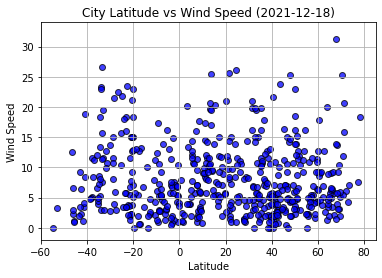

In [17]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Windspeed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date = datetime.date.today()
# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60, 85)
plt.ylim(-2,34)


# Save the figure
plt.savefig("../../output_data/LatWindSpeedInWorldCities.png")

# Show plot
plt.show()

The plot shows that there is no direct relationship between wind speed and latitude. 
A force called the Coriolis force causes the wind to deflect to the right of its intent path in the Northern Hemisphere and to the left in the Southern Hemisphere. The Corioils force is zero at the equator. The magnitude of Coriolis force depends on (1) the rotation of the Earth, (2) the speed of the moving object, and (3) its latitudinal location. The stronger the speed (such as wind speed), the stronger the Coriolis force. The higher the latitude, the stronger the Coriolis force. The affect is shown in our plot around 60° N Latitude.

# Linear Regression

In [18]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
nh_df = clean_city_data.loc[(clean_city_data['Lat'] >= 0),:]
nh_df

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
5,Trstená,49.3610,19.6125,35.20,31.98,87,89,7.00,SK,1639821073
8,Saint Paul Harbor,57.7900,-152.4072,30.90,30.90,76,100,5.48,US,1639820826
9,Newport,51.5877,-2.9984,47.55,46.36,90,61,11.92,GB,1639821054
10,Melilla,35.2937,-2.9383,59.38,59.38,82,75,11.50,ES,1639821074
13,Carnot,4.9409,15.8665,94.37,94.37,18,94,5.08,CF,1639821075
...,...,...,...,...,...,...,...,...,...,...
535,Lata,40.1629,-8.3327,52.92,49.87,60,19,5.17,PT,1639821777
536,Saryozek,44.3583,77.9753,40.93,40.93,33,64,3.04,KZ,1639821777
537,Batagay-Alyta,67.8006,130.4114,-23.31,-23.31,99,100,1.39,RU,1639821777
539,Belyy Yar,53.6039,91.3903,33.69,29.86,75,0,11.18,RU,1639821778


In [19]:
# Southern Hemisphere (less than 0 degrees latitude):
sh_df = clean_city_data.loc[(clean_city_data['Lat'] <= 0),:]
sh_df

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Kavieng,-2.5744,150.7967,80.69,80.69,82,100,7.56,PG,1639820794
1,Saint-Philippe,-21.3585,55.7679,86.11,83.97,72,16,2.01,RE,1639821072
2,Yulara,-25.2406,130.9889,109.24,109.24,8,15,10.36,AU,1639820871
3,Hermanus,-34.4187,19.2345,89.91,78.80,42,10,13.42,ZA,1639821073
6,Takaungu,-3.6837,39.8566,87.89,87.89,65,89,7.07,KE,1639821073
...,...,...,...,...,...,...,...,...,...,...
513,Gizo Government Station,-8.1030,156.8419,80.91,80.91,79,100,5.48,SB,1639821769
516,Puerto Nariño,-3.7703,-70.3831,71.47,71.47,95,100,0.43,CO,1639821770
522,Poya,-21.3500,165.1500,75.07,75.07,80,63,6.73,NC,1639821772
523,General Pico,-35.6566,-63.7568,67.69,67.69,54,5,12.08,AR,1639821773


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86
The r-squared is: 0.7410032928994814


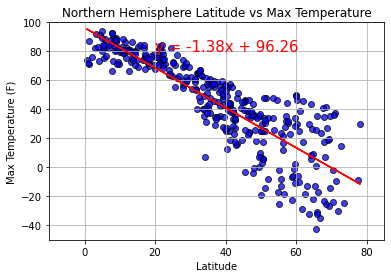

In [22]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat'].astype('float')
y = nh_df["Max temp"].astype('float')

def NorthLatTemp(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Max Temperature")
    plt.ylabel("Max Temperature (F)")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(20,80),fontsize=15,color="red")

    plt.xlim(-10,85)
    plt.ylim(-50,100)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()
    
NorthLatTemp(x,y)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.52
The r-squared is: 0.2673764918059679


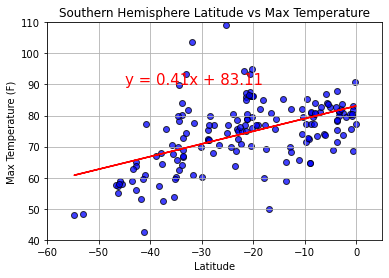

In [23]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Max temp"]

def SouthLatTemp(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Max Temperature")
    plt.ylabel("Max Temperature (F)")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-45,90),fontsize=15,color="red")

    plt.xlim(-60,5)
    plt.ylim(40,110)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()
    
SouthLatTemp(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.

Northern Hemisphere - Max Temp vs. Latitude Linear Regression scatter plot shows a high negative correlation of -0.86. This indicates as the temperature decreases as the latitude increases and vice versa. The r-squared of 0.74 shows a good fit to the data.
Southern Hemisphere - Max Temp vs. Latitude Linear Regression scatter plot shows a moderate positive correlation of 0.52. This indicates as the temperature increases as the latitude increases. The r-squared of 0.27 shows a poor fit to the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.45
The r-squared is: 0.2045361457991929


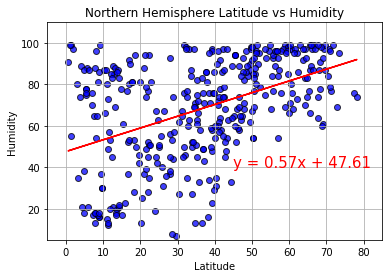

In [24]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Humidity"]

def NorthLatHum(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Humidity")
    plt.ylabel("Humidity")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(45,40),fontsize=15,color="red")

    plt.xlim(-5,85)
    plt.ylim(5,110)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

NorthLatHum(x,y)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.27
The r-squared is: 0.07547702649277364


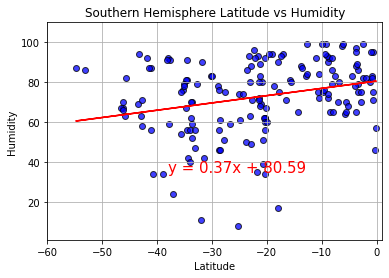

In [25]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Humidity"]

def SouthLatHum(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Humidity")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")

    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-38,35),fontsize=15,color="red")
    plt.xlim(-60,1)
    plt.ylim(1,110)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

SouthLatHum(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.

Northern Hemisphere - Humidity vs. Latitude Linear Regression scatter plot shows a moderate positive correlation of 0.45. This indicates as the humidity increases as the latitude increases. The r-squared of 0.20 shows a poor fit to the data.
Southern Hemisphere - Humidity vs. Latitude Linear Regression scatter plot shows a low positive correlation of 0.27. This indicates as the humidity increases as the latitude increases. The r-squared of 0.08 shows a poor fit to the data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.26
The r-squared is: 0.06924808709390491


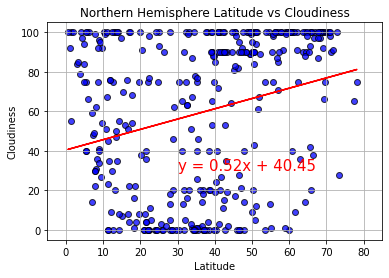

In [26]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Cloudiness"]

def NorthLatCloud(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Cloudiness")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")

    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(30,30),fontsize=15,color="red")
    plt.xlim(-5,85)
    plt.ylim(-5,105)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

NorthLatCloud(x,y)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.38
The r-squared is: 0.1457043726815236


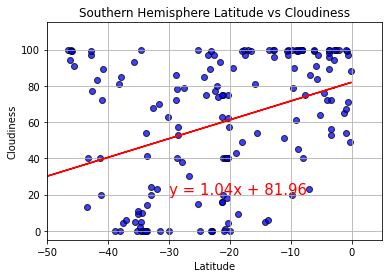

In [27]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Cloudiness"]

def SouthLatCloud(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Cloudiness")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")

    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
    plt.xlim(-50,5)
    plt.ylim(-5,115)
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

SouthLatCloud(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.

Northern Hemisphere - Cloudiness vs. Latitude Linear Regression scatter plot shows a low positive correlation of 0.26. This indicates as the cloudiness increases slightly as the latitude increases. The r-squared of 0.07 shows a poor fit to the data.
Southern Hemisphere - Cloudiness vs. Latitude Linear Regression scatter plot shows a low positive correlation of 0.38. This indicates as the cloudiness increases as the latitude increases. The r-squared of 0.15 shows a low fit to the data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.05
The r-squared is: 0.002641202503852614


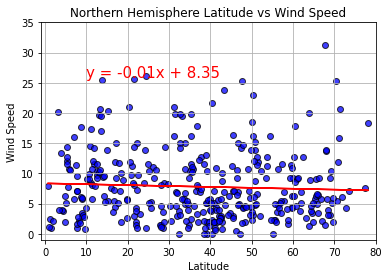

In [28]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Windspeed"]

def NorthLatWind(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    # Incorporate the other graph properties
    plt.title("Northern Hemisphere Latitude vs Wind Speed")
    plt.ylabel("Wind Speed")
    plt.xlabel("Latitude")
    plt.grid(True)

    plt.xlim(-1,80)
    plt.ylim(-1,35)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(10,26),fontsize=15,color="red")
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()

NorthLatWind(x,y)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.13
The r-squared is: 0.017173270060009373


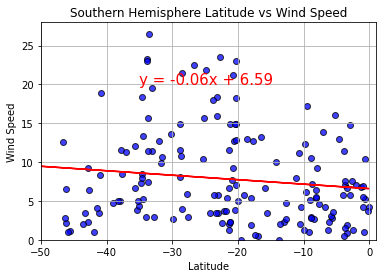

In [29]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Windspeed"]

def SouthLatWind(x,y):

    # Build a scatter plot for each data type
    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

    plt.xlim(-50,1)
    plt.ylim(0,28)

    # Incorporate the other graph properties
    plt.title("Southern Hemisphere Latitude vs Wind Speed")
    plt.ylabel("Wind Speed")
    plt.xlabel("Latitude")
    plt.grid(True)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(-35,20),fontsize=15,color="red")
    correlation = st.pearsonr(x,y)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f"The r-squared is: {rvalue**2}")
    # Show plot
    plt.show()
    
SouthLatWind(x,y)

TASK: After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have:

Correlation is a measurement of the strength of the relationship between two variables and their association with each other. It takes values between -1 and 1. 
r-squared is how well the regression model fits the observed data and takes values between 0 and 1.

Northern Hemisphere - Wind Speed vs. Latitude Linear Regression scatter plot shows a low negative correlation of 0.05. This indicates as the windspeed decreases slightly as the latitude increases and vice versa. The r-squared of 0.003 shows a very poor fit to the data.
Southern Hemisphere - Wind Speed vs. Latitude Linear Regression scatter plot shows a low negative correlation of -0.13. This indicates as the windspeed decreases as the latitude increases and vice versa. The r-squared of 0.017 shows a poor fit to the data.